<a href="https://colab.research.google.com/github/myniggname/abednigo.github.io/blob/main/Kmeans_Clustering_Project_RevoU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset from Google Cloud

In [1]:
#allow access on google drive

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
#importing required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#standardizing personal font & figure

plt.style.use(style = 'tableau-colorblind10')
plt.rcParams['figure.figsize'] = (15, 10)
sns.set(rc={'figure.figsize':(25,20)})

In [4]:
#importing dataset from bigquery

%%bigquery --project revoufsda-350705 dataset1

select 
user.user_id as user_id,
transaction.transaction_date as transaction_date,
transaction.transaction_id as transaction_id,
transaction.total_amount as total_amount
from `revoufsda-350705.Ecommerce.Transactions` as transaction
left join `revoufsda-350705.Ecommerce.Transaction_Item` as item
on transaction.transaction_id = item.transaction_id
left join `revoufsda-350705.Ecommerce.Product` as product
on item.product_id = product.product_id
left join `revoufsda-350705.Ecommerce.User` as user
on transaction.user_id = user.user_id
left join `revoufsda-350705.Ecommerce.Merchant` as merchant
on product.merchant_id = merchant.merchant_id
where transaction.status = 'Completed' 


In [5]:
dataset1.head()

,user_id,transaction_date,transaction_id,total_amount
0,10671,2020-03-19 13:12:43+00:00,201635,2560000
1,10671,2020-03-19 13:12:43+00:00,201635,2560000
2,10572,2020-12-12 08:29:15+00:00,302777,2560000
3,10572,2020-12-12 08:29:15+00:00,302777,2560000
4,20893,2020-02-15 20:14:16+00:00,201475,3680000


In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14295 entries, 0 to 14294
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   user_id           14295 non-null  int64              
 1   transaction_date  14295 non-null  datetime64[ns, UTC]
 2   transaction_id    14295 non-null  int64              
 3   total_amount      14295 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 446.8 KB


In [ ]:
#finding n.unique for user and transaction_id
#find total number transaction

In [7]:
#importing another dataset to analyze KMeans as user_dataset

%%bigquery --project revoufsda-350705 user_dataset

select
user.user_id,
user.regist_date,
transaction.transaction_date, 
transaction.transaction_id,
product.product,
category.product_category as category, 
item.qty,
product.price,
merchant.merchant_name,
user.gender,
user.province,
user.city
from `revoufsda-350705.Ecommerce.Transactions` as transaction
left join `revoufsda-350705.Ecommerce.Transaction_Item` as item
on transaction.transaction_id = item.transaction_id
left join `revoufsda-350705.Ecommerce.Product` as product
on item.product_id = product.product_id
left join `revoufsda-350705.Ecommerce.Product_Category` as category
on product.product_category = category.product_category_id
left join `revoufsda-350705.Ecommerce.User` as user
on transaction.user_id = user.user_id
left join `revoufsda-350705.Ecommerce.Merchant` as merchant
on product.merchant_id = merchant.merchant_id
where transaction.status = 'Completed'

In [8]:
user_dataset

,user_id,regist_date,transaction_date,transaction_id,product,category,qty,price,merchant_name,gender,province,city
0,10671,2020-01-01,2020-03-19 13:12:43+00:00,201635,Refridgerator,Electronics,1,1590000,Ultima Trimegah,male,DKI Jakarta,South Jakarta
1,10671,2020-01-01,2020-03-19 13:12:43+00:00,201635,Oven,Electronics,1,970000,Utopia Group,male,DKI Jakarta,South Jakarta
2,10572,2019-12-29,2020-12-12 08:29:15+00:00,302777,Oven,Electronics,1,970000,Utopia Group,male,DKI Jakarta,Jakarta Selatan
3,10572,2019-12-29,2020-12-12 08:29:15+00:00,302777,S Pencil,Electronics,1,1590000,Hilltop,male,DKI Jakarta,Jakarta Selatan
4,20893,2020-01-19,2020-02-15 20:14:16+00:00,201475,Toys Lego,Hobbies,1,1660000,Munchies,female,DKI Jakarta,Jakarta Timur
...,...,...,...,...,...,...,...,...,...,...,...,...
14290,20894,2020-01-07,2020-11-17 15:53:52+00:00,302507,Apple Pencil,Electronics,1,1325400,Unfair Shop,female,Jawa Barat,Kota Bekasi
14291,10211,2020-12-18,2020-12-18 09:38:55+00:00,301348,Jeans,Clothing,1,200000,Diamonday,male,DKI Jakarta,Jakarta Barat
14292,10211,2020-12-18,2020-12-18 09:38:55+00:00,301348,Frying Oil,Groceries,1,35000,Doid,male,DKI Jakarta,Jakarta Barat
14293,10127,2021-05-24,2021-06-13 21:52:56+00:00,304216,Stapler,Stationery,1,35000,Erajaya,male,Jawa Timur,surabaya


In [9]:
user_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14295 entries, 0 to 14294
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   user_id           14295 non-null  int64              
 1   regist_date       14295 non-null  object             
 2   transaction_date  14295 non-null  datetime64[ns, UTC]
 3   transaction_id    14295 non-null  int64              
 4   product           14295 non-null  object             
 5   category          14295 non-null  object             
 6   qty               14295 non-null  int64              
 7   price             14295 non-null  int64              
 8   merchant_name     14295 non-null  object             
 9   gender            14295 non-null  object             
 10  province          14295 non-null  object             
 11  city              14295 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(7)
memory usage:

# Cleaning the data 

- Check null value
- Check duplicate row and delete duplicate row
- Change datatype

In [10]:
dataset1.isnull().sum()

user_id             0
transaction_date    0
transaction_id      0
total_amount        0
dtype: int64

In [11]:
dataset1.nunique()

user_id             1584
transaction_date    9548
transaction_id      9549
total_amount         740
dtype: int64

In [12]:
dataset1.duplicated().sum()

4746

In [13]:
dataset1.loc[dataset1.duplicated(keep=False), :]

,user_id,transaction_date,transaction_id,total_amount
0,10671,2020-03-19 13:12:43+00:00,201635,2560000
1,10671,2020-03-19 13:12:43+00:00,201635,2560000
2,10572,2020-12-12 08:29:15+00:00,302777,2560000
3,10572,2020-12-12 08:29:15+00:00,302777,2560000
4,20893,2020-02-15 20:14:16+00:00,201475,3680000
...,...,...,...,...
14290,20894,2020-11-17 15:53:52+00:00,302507,3025400
14291,10211,2020-12-18 09:38:55+00:00,301348,235000
14292,10211,2020-12-18 09:38:55+00:00,301348,235000
14293,10127,2021-06-13 21:52:56+00:00,304216,235000


In [14]:
dataset1.drop_duplicates(inplace=True)

In [15]:
dataset1.nunique()

user_id             1584
transaction_date    9548
transaction_id      9549
total_amount         740
dtype: int64

In [16]:
dataset1['transaction_date'] = pd.to_datetime(dataset1['transaction_date'])

In [17]:
dataset1.astype({'transaction_id' : str},
               {'user_id' : str})

,user_id,transaction_date,transaction_id,total_amount
0,10671,2020-03-19 13:12:43+00:00,201635,2560000
2,10572,2020-12-12 08:29:15+00:00,302777,2560000
4,20893,2020-02-15 20:14:16+00:00,201475,3680000
6,20794,2020-07-10 07:38:09+00:00,202753,800000
7,20596,2020-08-02 06:58:15+00:00,202834,800000
...,...,...,...,...
14286,20042,2021-12-24 12:24:28+00:00,306810,75000
14287,10590,2021-02-15 16:59:38+00:00,303756,2763000
14289,20894,2020-11-17 15:53:52+00:00,302507,3025400
14291,10211,2020-12-18 09:38:55+00:00,301348,235000


In [19]:
#Check transactions date range

print("Min Date: {} \nMax Date: {}".format(dataset1['transaction_date'].min(), dataset1['transaction_date'].max()))

Min Date: 2020-01-01 06:29:14+00:00 
Max Date: 2021-12-30 21:45:34+00:00


# Cleaning the table of data_user

In [20]:
#Create new query table for further K-Means analysis
#This dataset has the same value as user_dataset from previous query

%%bigquery --project revoufsda-350705 data_user

select user.user_id,
user.regist_date,
transaction.transaction_date, 
transaction.transaction_id,
product.product,
category.product_category as category, 
item.qty,
product.price,
merchant.merchant_name,
user.gender,
user.province,
user.city
from `revoufsda-350705.Ecommerce.Transactions` as transaction
left join `revoufsda-350705.Ecommerce.Transaction_Item` as item
on transaction.transaction_id = item.transaction_id
left join `revoufsda-350705.Ecommerce.Product` as product
on item.product_id = product.product_id
left join `revoufsda-350705.Ecommerce.Product_Category` as category
on product.product_category = category.product_category_id
left join `revoufsda-350705.Ecommerce.User` as user
on transaction.user_id = user.user_id
left join `revoufsda-350705.Ecommerce.Merchant` as merchant
on product.merchant_id = merchant.merchant_id
where transaction.status = 'Completed'

In [21]:
data_user = data_user.astype({'user_id': str,
                              'transaction_id': str})

In [22]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14295 entries, 0 to 14294
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   user_id           14295 non-null  object             
 1   regist_date       14295 non-null  object             
 2   transaction_date  14295 non-null  datetime64[ns, UTC]
 3   transaction_id    14295 non-null  object             
 4   product           14295 non-null  object             
 5   category          14295 non-null  object             
 6   qty               14295 non-null  int64              
 7   price             14295 non-null  int64              
 8   merchant_name     14295 non-null  object             
 9   gender            14295 non-null  object             
 10  province          14295 non-null  object             
 11  city              14295 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage:

In [23]:
data_user.isnull().sum()

user_id             0
regist_date         0
transaction_date    0
transaction_id      0
product             0
category            0
qty                 0
price               0
merchant_name       0
gender              0
province            0
city                0
dtype: int64

In [24]:
data_user.loc[data_user.duplicated(keep=False),:]

,user_id,regist_date,transaction_date,transaction_id,product,category,qty,price,merchant_name,gender,province,city
261,20211,2020-04-18,2021-06-19 16:11:22+00:00,304228,T-Shirt,Clothing,1,100000,Merdeka shop,female,Jawa Tengah,Semarang
262,20211,2020-04-18,2021-06-19 16:11:22+00:00,304228,T-Shirt,Clothing,1,100000,Merdeka shop,female,Jawa Tengah,Semarang
289,20881,2019-12-24,2020-04-02 07:08:19+00:00,202052,Samsung TV,Electronics,1,1700000,Hilltop,female,Jawa Barat,Kota Bogor
290,20881,2019-12-24,2020-04-02 07:08:19+00:00,202052,Samsung TV,Electronics,1,1700000,Hilltop,female,Jawa Barat,Kota Bogor
362,10632,2020-01-14,2020-06-28 12:19:08+00:00,202489,Samsung Phone,Electronics,1,1870000,Hilltop,male,DKI Jakarta,Central Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
13733,20869,2020-02-01,2021-01-11 11:28:40+00:00,303558,Harry Poter Series Books,Hobbies,1,1510000,Munchies,female,Jawa Tengah,Semarang
13763,20568,2020-01-06,2020-12-16 15:07:38+00:00,301879,Leather Boots,Shoes,1,630000,Madzilla,female,DKI Jakarta,Jakarta Selatan
13764,20568,2020-01-06,2020-12-16 15:07:38+00:00,301879,Leather Boots,Shoes,1,630000,Madzilla,female,DKI Jakarta,Jakarta Selatan
13780,20949,2019-12-31,2020-12-28 15:50:34+00:00,302985,Apple Phone,Electronics,1,1190000,Icon Rentals,female,DKI Jakarta,Jakarta Barat


In [25]:
data_user['city'].unique()

array(['South Jakarta', 'Jakarta Selatan', 'Jakarta Timur', 'Bandung',
       'surabaya', 'Jakarta Pusat', 'Surabaya', 'Semarang',
       'Kota Tangerang', 'Jakarta Barat', 'Central Jakarta',
       'Tangerang Selatan', 'Kota Bekasi', 'Jakarta Utara', 'Kota Depok',
       'Kota Bogor'], dtype=object)

In [26]:
data_user['city'] = data_user['city'].replace(['South Jakarta', 'surabaya', 'Central Jakarta'],
                                              ['Jakarta Selatan', 'Surabaya', 'Jakarta Pusat'])

In [27]:
data_user['city'].unique

<bound method Series.unique of 0        Jakarta Selatan
1        Jakarta Selatan
2        Jakarta Selatan
3        Jakarta Selatan
4          Jakarta Timur
              ...       
14290        Kota Bekasi
14291      Jakarta Barat
14292      Jakarta Barat
14293           Surabaya
14294           Surabaya
Name: city, Length: 14295, dtype: object>

# **Create RFM Table**

Recency (R) - measures how recent was each user's last transaction

Frequency (F) - measures how many transaction user has done in the last N periods

Monetary Value (M) - measures how much has user spent in the last N periods

In [28]:
snapshot_date = max(dataset1.transaction_date) + dt.timedelta(days = 1)

In [29]:
snapshot_date

Timestamp('2021-12-31 21:45:34+0000', tz='UTC')

In [30]:
dataset1.head()

,user_id,transaction_date,transaction_id,total_amount
0,10671,2020-03-19 13:12:43+00:00,201635,2560000
2,10572,2020-12-12 08:29:15+00:00,302777,2560000
4,20893,2020-02-15 20:14:16+00:00,201475,3680000
6,20794,2020-07-10 07:38:09+00:00,202753,800000
7,20596,2020-08-02 06:58:15+00:00,202834,800000


In [31]:
# Calculate Recency, Frequency and Monetary Values for each customer in the dataFrame
rfm_data = dataset1.groupby(['user_id']).agg({
                                        'transaction_date' : lambda x: (snapshot_date - x.max()).days,
                                        'transaction_id' : 'count',
                                        'total_amount' : 'sum'
                                        })

# Rename the created data columns in order to interpritate the obtained results
rfm_data.rename(columns = {
                            'transaction_date' : 'Recency',
                            'transaction_id' : 'Frequency',
                            'total_amount' : 'MonetaryValue'
                            }, inplace = True)

# Check the obtained results
rfm_data.head()

,Recency,Frequency,MonetaryValue
user_id,,,
10000,375,1,95000
10001,44,3,410000
10002,8,4,780000
10003,247,1,115000
10004,218,2,505000


In [32]:
rfm_data

,Recency,Frequency,MonetaryValue
user_id,,,
10000,375,1,95000
10001,44,3,410000
10002,8,4,780000
10003,247,1,115000
10004,218,2,505000
...,...,...,...
20996,60,16,36711000
20997,100,10,23822000
20998,7,22,51380000


# Displaying Skewness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

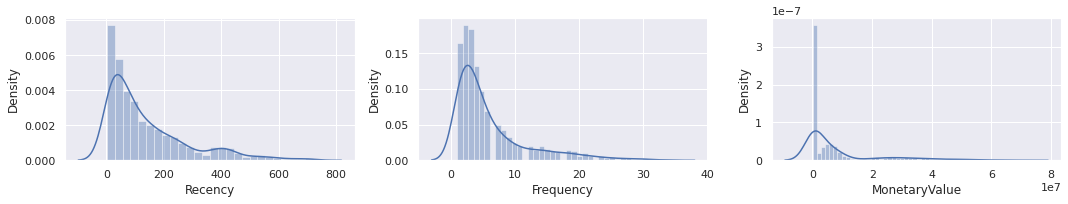

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(rfm_data['Recency'], ax=ax[0])
sns.distplot(rfm_data['Frequency'], ax=ax[1])
sns.distplot(rfm_data['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

In [35]:
#Mean
print(np.mean(rfm_data))

Recency          1.400177e+02
Frequency        6.028409e+00
MonetaryValue    8.470667e+06
dtype: float64


In [36]:
#Standard Deviation
print(np.std(rfm_data))

Recency          1.439701e+02
Frequency        5.847155e+00
MonetaryValue    1.345281e+07
dtype: float64


# Transform the data into normal distribution using box-cox transformation

In [37]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm_data[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_data[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_data[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_data[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(rfm_data[x].skew().round(2))
    print(np.log(rfm_data[x]).skew().round(2))
    print(np.sqrt(rfm_data[x]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm_data[x])[0]).skew().round(2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

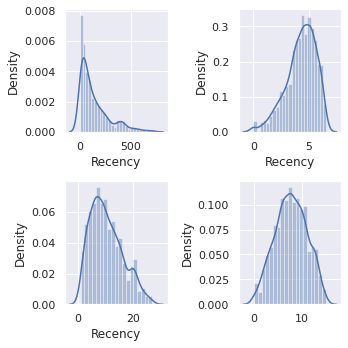

1.52
-0.74
0.59
-0.06


In [38]:
analyze_skewness('Recency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

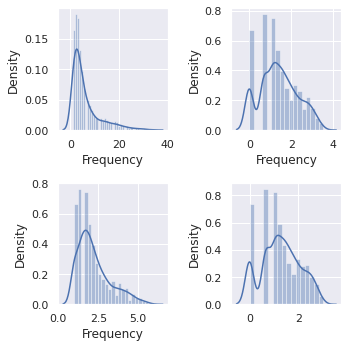

1.87
0.17
1.04
0.02


In [39]:
analyze_skewness('Frequency')

In [40]:
pd.Series(np.cbrt(rfm_data['MonetaryValue'])).values

array([ 45.62902635,  74.28958841,  92.05164083, ..., 371.7617467 ,
       306.11808563, 352.07582733])

In [41]:
#Data after transform

rfm_fix = pd.DataFrame()
rfm_fix["Recency"] = stats.boxcox(rfm_data['Recency'])[0]
rfm_fix["Frequency"] = stats.boxcox(rfm_data['Frequency'])[0]
rfm_fix["MonetaryValue"] = pd.Series(np.cbrt(rfm_data['MonetaryValue'])).values
rfm_fix.head()

,Recency,Frequency,MonetaryValue
0,12.279469,0.000000,45.629026
1,5.928429,1.046621,74.289588
2,2.642163,1.304200,92.051641
3,10.794386,0.000000,48.629441
4,10.376244,0.672204,79.633742


# Applying K-Means Method

In [42]:
# Centering and Scaling Variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_fix)
rfm_normalized = scaler.transform(rfm_fix)
print(rfm_normalized.mean(axis = 0).round(2))
print(rfm_normalized.std(axis = 0).round(2))

[-0. -0.  0.]
[1. 1. 1.]


In [43]:
pd.DataFrame(rfm_normalized).head()

,0,1,2
0,1.414671,-1.653005,-1.058485
1,-0.532434,-0.310152,-0.767522
2,-1.539939,0.020331,-0.587201
3,0.959373,-1.653005,-1.028024
4,0.831179,-0.790543,-0.713268


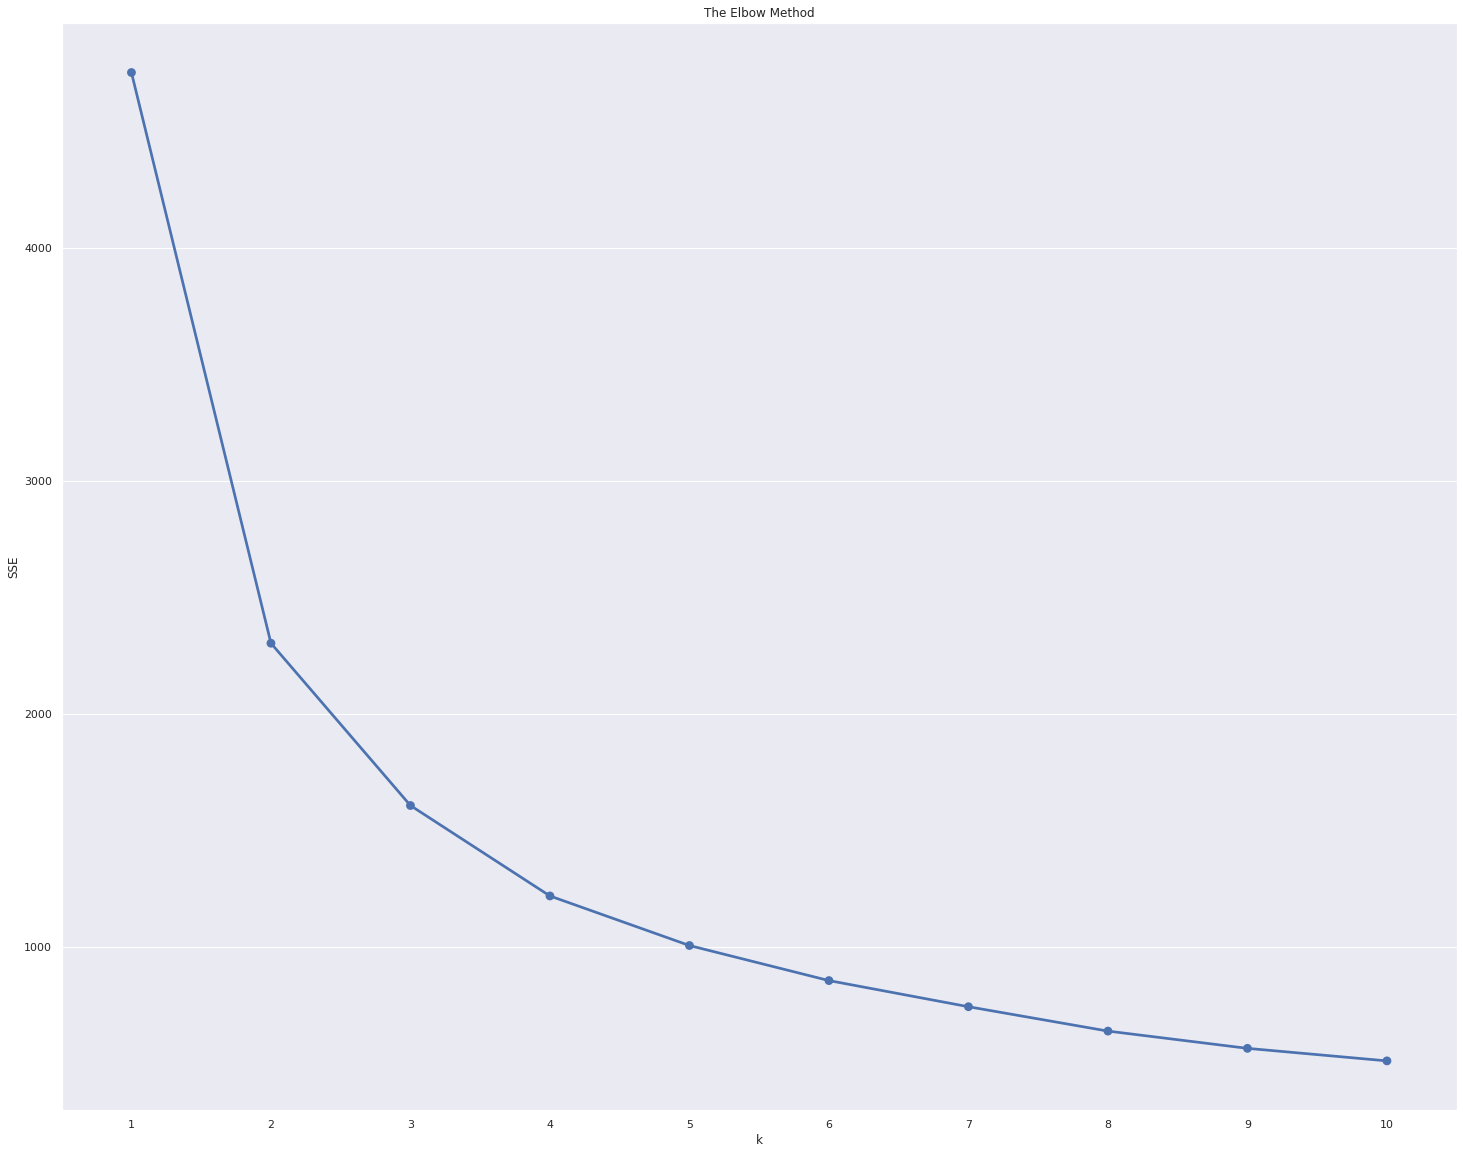

In [44]:
# Modeling by Choosing K-Number

from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [45]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(rfm_normalized)
model.labels_.shape

(1584,)

In [46]:
model1 = KMeans(n_clusters=4, random_state=42)
model1.fit(rfm_normalized)
model1.labels_.shape

(1584,)

In [47]:
rfm_data.shape

(1584, 3)

# Clustering Analysis

In [48]:
rfm_data1 = rfm_data.copy()
rfm_data1.head()

,Recency,Frequency,MonetaryValue
user_id,,,
10000,375,1,95000
10001,44,3,410000
10002,8,4,780000
10003,247,1,115000
10004,218,2,505000


In [49]:
rfm_data1["Cluster"] = model.labels_
rfm_data1.head()

,Recency,Frequency,MonetaryValue,Cluster
user_id,,,,
10000,375,1,95000,1
10001,44,3,410000,2
10002,8,4,780000,2
10003,247,1,115000,1
10004,218,2,505000,1


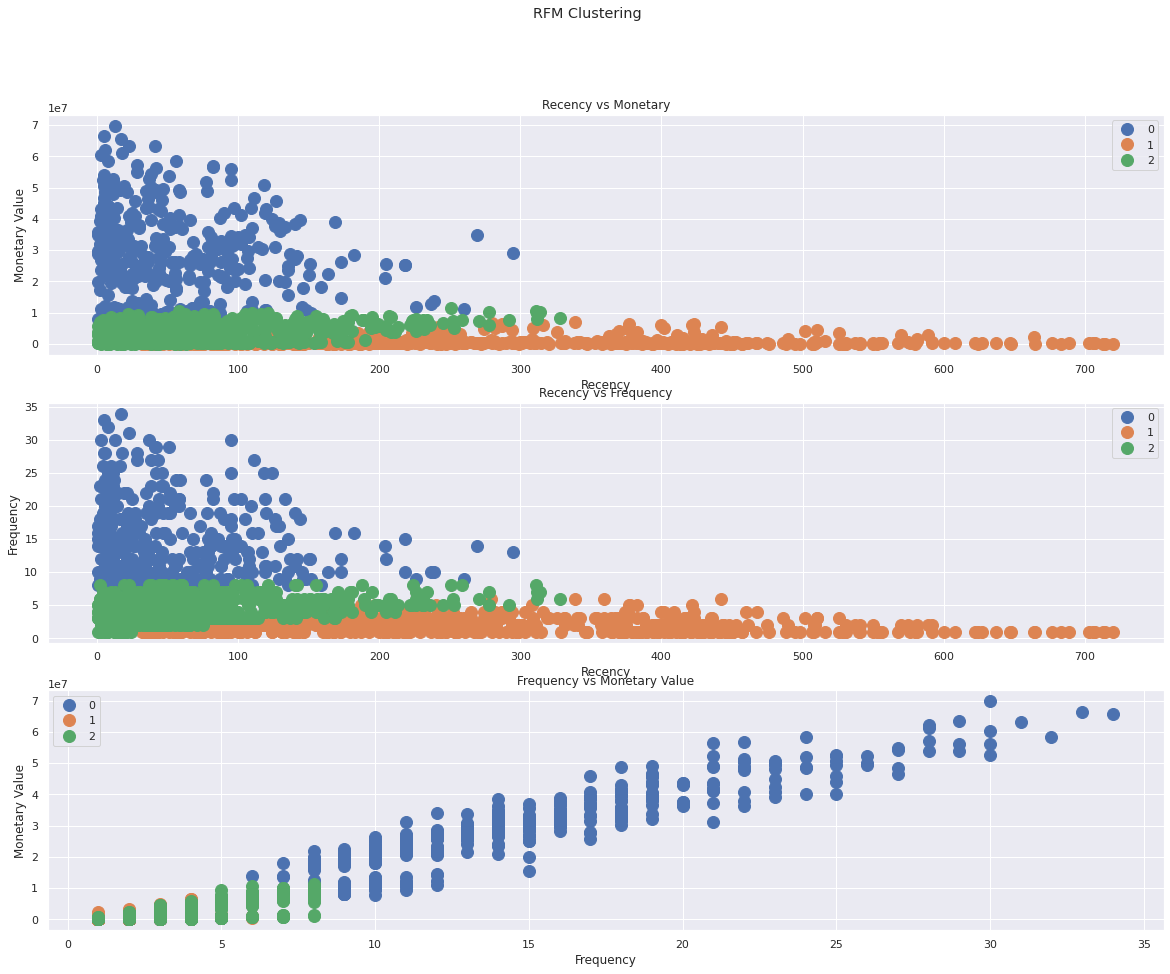

In [50]:
groups = rfm_data1.groupby('Cluster')

# Plot
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(3, 1)
fig.suptitle('RFM Clustering')
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax[0].plot(group['Recency'], group['MonetaryValue'], marker='o', linestyle='', ms=12, label=name)
ax[0].legend()
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Monetary Value')
ax[0].set_title('Recency vs Monetary')

for name, group in groups:
    ax[1].plot(group['Recency'], group['Frequency'], marker='o', linestyle='', ms=12, label=name)
ax[1].legend()
ax[1].set_xlabel('Recency')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Recency vs Frequency')

for name, group in groups:
    ax[2].plot(group['Frequency'], group['MonetaryValue'], marker='o', linestyle='', ms=12, label=name)
ax[2].legend()
ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Monetary Value')
ax[2].set_title('Frequency vs Monetary Value')

plt.show()

In [51]:
rfm_data1.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          54.0      15.0    29150705.0   371
1         275.0       2.0      693502.0   564
2          71.0       4.0     3407535.0   649

Insight

Cluster 0 - Loyal Customer

Users in this cluster is those who has low recency (with average 54 days), high transaction frequency (average 15 transactions), high spending (average Rp29.150.705)
Cluster 1 - Lost Customer

Users in this cluster is those who has high recency (with average 275 days), low transaction frequency (average 2 transactions), low spending (average Rp693.502)
Cluster 2 - Make Them Do More

Users in this cluster is those who has low recency (average 71 days), low transaction frequency (average 4 transactions), low spending (average Rp3.407.535)

# Qualitative Analysis for Each Cluster

In [52]:
rfm_data1 = rfm_data1.reset_index()
rfm_data1.head()

,user_id,Recency,Frequency,MonetaryValue,Cluster
0,10000,375,1,95000,1
1,10001,44,3,410000,2
2,10002,8,4,780000,2
3,10003,247,1,115000,1
4,10004,218,2,505000,1


In [53]:
rfm_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user_id        1584 non-null   int64
 1   Recency        1584 non-null   int64
 2   Frequency      1584 non-null   int64
 3   MonetaryValue  1584 non-null   int64
 4   Cluster        1584 non-null   int32
dtypes: int32(1), int64(4)
memory usage: 55.8 KB


In [54]:
rfm_data1 = rfm_data1.astype({'user_id': str})

In [55]:
rfm_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        1584 non-null   object
 1   Recency        1584 non-null   int64 
 2   Frequency      1584 non-null   int64 
 3   MonetaryValue  1584 non-null   int64 
 4   Cluster        1584 non-null   int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 55.8+ KB


In [56]:
data_user.head()

,user_id,regist_date,transaction_date,transaction_id,product,category,qty,price,merchant_name,gender,province,city
0,10671,2020-01-01,2020-03-19 13:12:43+00:00,201635,Refridgerator,Electronics,1,1590000,Ultima Trimegah,male,DKI Jakarta,Jakarta Selatan
1,10671,2020-01-01,2020-03-19 13:12:43+00:00,201635,Oven,Electronics,1,970000,Utopia Group,male,DKI Jakarta,Jakarta Selatan
2,10572,2019-12-29,2020-12-12 08:29:15+00:00,302777,Oven,Electronics,1,970000,Utopia Group,male,DKI Jakarta,Jakarta Selatan
3,10572,2019-12-29,2020-12-12 08:29:15+00:00,302777,S Pencil,Electronics,1,1590000,Hilltop,male,DKI Jakarta,Jakarta Selatan
4,20893,2020-01-19,2020-02-15 20:14:16+00:00,201475,Toys Lego,Hobbies,1,1660000,Munchies,female,DKI Jakarta,Jakarta Timur


In [57]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14295 entries, 0 to 14294
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   user_id           14295 non-null  object             
 1   regist_date       14295 non-null  object             
 2   transaction_date  14295 non-null  datetime64[ns, UTC]
 3   transaction_id    14295 non-null  object             
 4   product           14295 non-null  object             
 5   category          14295 non-null  object             
 6   qty               14295 non-null  int64              
 7   price             14295 non-null  int64              
 8   merchant_name     14295 non-null  object             
 9   gender            14295 non-null  object             
 10  province          14295 non-null  object             
 11  city              14295 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage:

In [58]:
result = pd.merge(data_user, rfm_data1, how='left', on='user_id')
result.head()

,user_id,regist_date,transaction_date,transaction_id,product,category,qty,price,merchant_name,gender,province,city,Recency,Frequency,MonetaryValue,Cluster
0,10671,2020-01-01,2020-03-19 13:12:43+00:00,201635,Refridgerator,Electronics,1,1590000,Ultima Trimegah,male,DKI Jakarta,Jakarta Selatan,100,14,34149400,0
1,10671,2020-01-01,2020-03-19 13:12:43+00:00,201635,Oven,Electronics,1,970000,Utopia Group,male,DKI Jakarta,Jakarta Selatan,100,14,34149400,0
2,10572,2019-12-29,2020-12-12 08:29:15+00:00,302777,Oven,Electronics,1,970000,Utopia Group,male,DKI Jakarta,Jakarta Selatan,13,30,69754600,0
3,10572,2019-12-29,2020-12-12 08:29:15+00:00,302777,S Pencil,Electronics,1,1590000,Hilltop,male,DKI Jakarta,Jakarta Selatan,13,30,69754600,0
4,20893,2020-01-19,2020-02-15 20:14:16+00:00,201475,Toys Lego,Hobbies,1,1660000,Munchies,female,DKI Jakarta,Jakarta Timur,11,25,52757200,0


In [59]:
result['Total Purchase'] = result['qty']*result['price']
result = result.drop(columns=['Recency', 'Frequency', 'MonetaryValue','price'])

result.head()

,user_id,regist_date,transaction_date,transaction_id,product,category,qty,merchant_name,gender,province,city,Cluster,Total Purchase
0,10671,2020-01-01,2020-03-19 13:12:43+00:00,201635,Refridgerator,Electronics,1,Ultima Trimegah,male,DKI Jakarta,Jakarta Selatan,0,1590000
1,10671,2020-01-01,2020-03-19 13:12:43+00:00,201635,Oven,Electronics,1,Utopia Group,male,DKI Jakarta,Jakarta Selatan,0,970000
2,10572,2019-12-29,2020-12-12 08:29:15+00:00,302777,Oven,Electronics,1,Utopia Group,male,DKI Jakarta,Jakarta Selatan,0,970000
3,10572,2019-12-29,2020-12-12 08:29:15+00:00,302777,S Pencil,Electronics,1,Hilltop,male,DKI Jakarta,Jakarta Selatan,0,1590000
4,20893,2020-01-19,2020-02-15 20:14:16+00:00,201475,Toys Lego,Hobbies,1,Munchies,female,DKI Jakarta,Jakarta Timur,0,1660000


In [60]:
#Save result table to csv

result.to_csv('result_cluster.csv', index=False)

In [61]:
cluster_0 = result.loc[result['Cluster'] == 0]
cluster_1 = result.loc[result['Cluster'] == 1]
cluster_2 = result.loc[result['Cluster'] == 2]

cluster_0 = cluster_0.drop(columns='Cluster')
cluster_1 = cluster_1.drop(columns='Cluster')
cluster_2 = cluster_2.drop(columns='Cluster')

In [64]:
#Category for customers' most purchased productsr

result.groupby(['Cluster', 'category'])['transaction_id'].count().sort_values(ascending=False).groupby(level=0).head(1)

Cluster  category      
0        Electronics       4160
2        Sport Equiment    1122
1        Groceries          667
Name: transaction_id, dtype: int64

In [65]:
#The most hometowns for the customer's cluster

result.groupby(['Cluster', 'city'])['transaction_id'].count().sort_values(ascending=False).groupby(level=0).head(1)

Cluster  city         
0        Jakarta Pusat    1143
2        Surabaya          545
1        Surabaya          326
Name: transaction_id, dtype: int64

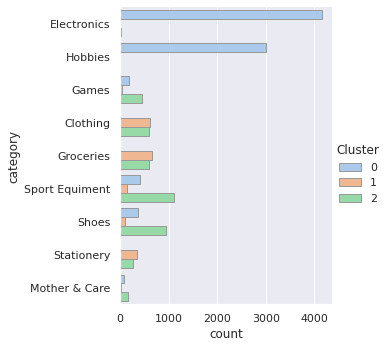

In [66]:
sns.catplot(y="category", hue="Cluster", kind="count",
            palette="pastel", edgecolor=".6",
            data=result)

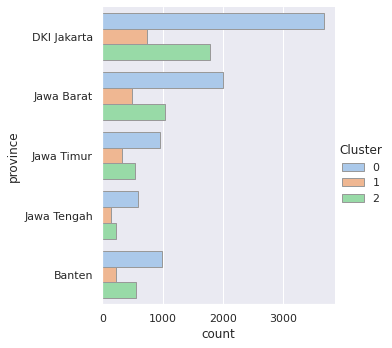

In [67]:
sns.catplot(y="province", hue="Cluster", kind="count",
            palette="pastel", edgecolor=".6",
            data=result)

# Clustering Analysis

In [68]:
rfm_data2 = rfm_data.copy()
rfm_data2.head()

,Recency,Frequency,MonetaryValue
user_id,,,
10000,375,1,95000
10001,44,3,410000
10002,8,4,780000
10003,247,1,115000
10004,218,2,505000


In [69]:
rfm_data2["Cluster"] = model1.labels_
rfm_data2.head()

,Recency,Frequency,MonetaryValue,Cluster
user_id,,,,
10000,375,1,95000,1
10001,44,3,410000,3
10002,8,4,780000,3
10003,247,1,115000,1
10004,218,2,505000,1


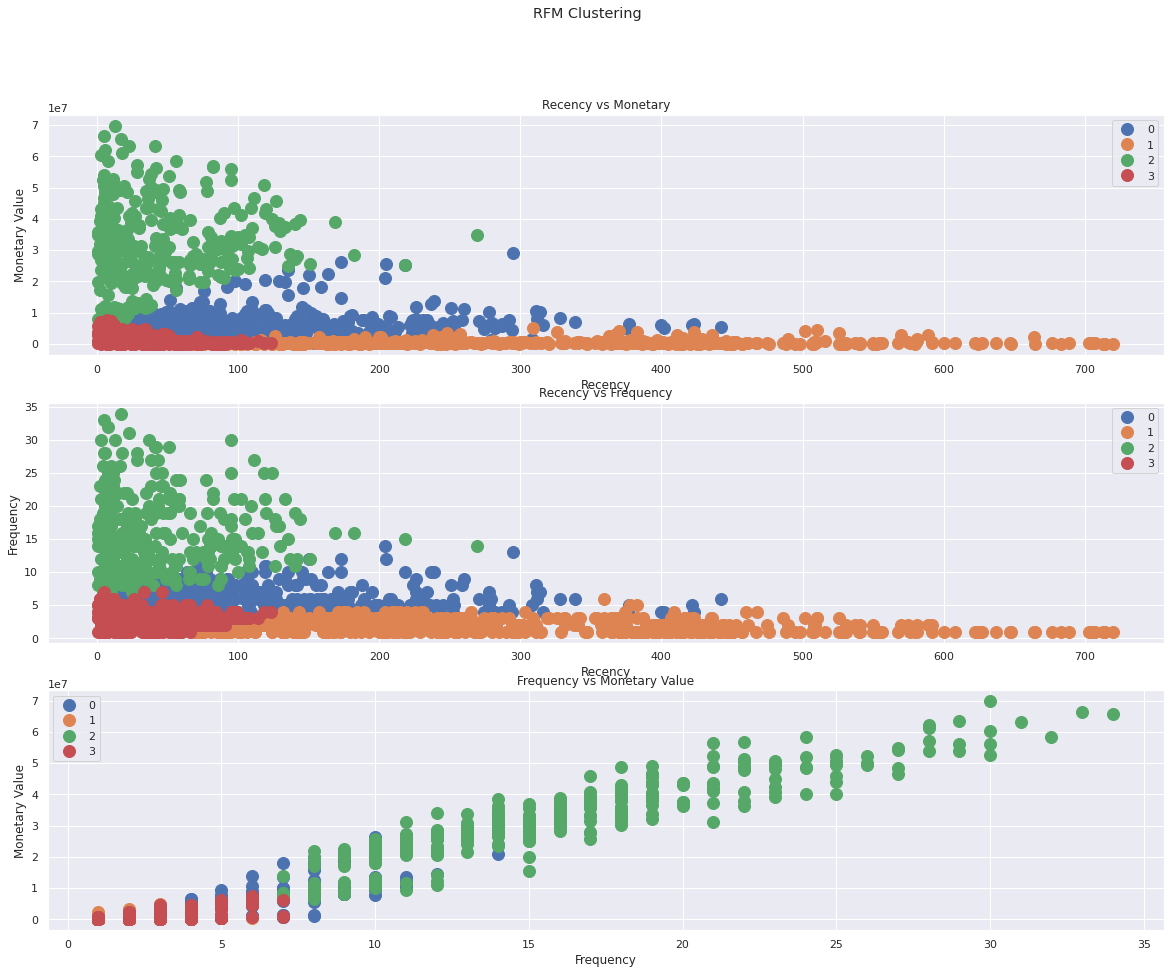

In [70]:
groups = rfm_data2.groupby('Cluster')

# Plot
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(3, 1)
fig.suptitle('RFM Clustering')
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax[0].plot(group['Recency'], group['MonetaryValue'], marker='o', linestyle='', ms=12, label=name)
ax[0].legend()
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Monetary Value')
ax[0].set_title('Recency vs Monetary')

for name, group in groups:
    ax[1].plot(group['Recency'], group['Frequency'], marker='o', linestyle='', ms=12, label=name)
ax[1].legend()
ax[1].set_xlabel('Recency')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Recency vs Frequency')

for name, group in groups:
    ax[2].plot(group['Frequency'], group['MonetaryValue'], marker='o', linestyle='', ms=12, label=name)
ax[2].legend()
ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Monetary Value')
ax[2].set_title('Frequency vs Monetary Value')

plt.show()

In [ ]:
rfm_data2.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         123.0       6.0     6725513.0   414
1         293.0       2.0      486568.0   488
2          43.0      16.0    32031686.0   311
3          38.0       3.0     1169474.0   371

Insight

- **Cluster 0 - Loyal Customer**
  - Users in this cluster is those who has low recency (with average 54 days), high transaction frequency (average 15 transactions), high spending (average Rp29.150.705)

- **Cluster 1 - Lost Customer**
  - Users in this cluster is those who has high recency (with average 275 days), low transaction frequency (average 2 transactions), low spending (average Rp693.502) 

- **Cluster 2 - Make Them Do More**
  - Users in this cluster is those who has low recency (average 71 days), low transaction frequency (average 4 transactions), low spending (average Rp3.407.535)